In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tsne import bh_sne

In [2]:
data_root = 'data/freesound/'

In [4]:
import cPickle as pickle
with open(data_root + 'analysis.pkl', 'r') as f:
    analysis = pickle.load(f)

In [46]:
def normalize(X):
    X -= X.min(axis=0)
    X /= X.max(axis=0)
    return X

In [6]:
labels = \
    ['Peak Position', 'Overall Power', 'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Rolloff'] + \
    ['Initial Power', 'Middle Power', 'Late Power'] + \
    ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
np.savetxt(data_root + '/analysis.columns.tsv', labels, fmt='%s', delimiter='\t')

In [47]:
def get_normalized(analysis):
    X = []
    for x in analysis:
        cur = [
            x['peak'],
            x['power'],
            x['centroid'],
            x['bandwidth'],
            x['rolloff'],
        ]
        cur.extend(x['percentiles'])
        cur.extend(x['chroma'])
        X.append(cur)
    X = np.array(X)
    X = normalize(X)
    return X

def get_weighted(analysis, weights):
    X = get_normalized(analysis)
    if 'peak' in weights:
        X[:,0] *= weights['peak']
    if 'power' in weights:
        X[:,1] *= weights['power']
    if 'centroid' in weights:
        X[:,2] *= weights['centroid']
    if 'bandwidth' in weights:
        X[:,3] *= weights['bandwidth']
    if 'rolloff' in weights:
        X[:,4] *= weights['rolloff']
    if 'percentiles' in weights:
        X[:,5:7] *= weights['percentiles']
    if 'chroma' in weights:
        X[:,7:] *= weights['chroma']
    return X

In [51]:
np.savetxt(data_root + 'analysis.tsv', get_normalized(analysis), fmt='%.5f', delimiter='\t')

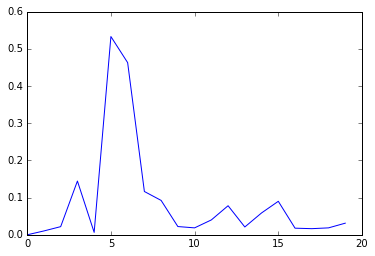

In [50]:
normalized = get_normalized(analysis)
# normalized -= normalized.min(axis=0)
# normalized /= normalized.max(axis=0)
plt.plot(normalized[:24].min(axis=0))
plt.show()

In [20]:
def save_tsne(basename, X, d, perplexity):
    embedded = bh_sne(X, d=d, perplexity=perplexity)
    embedded = normalize(embedded)
    np.savetxt(basename + '.{}.{}d.tsv'.format(perplexity, d), embedded, fmt='%.5f', delimiter='\t')

In [15]:
def run_weighted(basename, analysis, weights, perplexity):
    X = get_weighted(analysis, weights)
    save_tsne(basename, X, 2, perplexity)
    save_tsne(basename, X, 3, perplexity)

In [16]:
def run_perplexities(basename, analysis, weights):
    for perplexity in [1, 10, 30, 50, 100]:
        run_weighted(basename, analysis, weights, perplexity)

In [21]:
run_perplexities(data_root + 'tsne/env', analysis, {
    'peak': 1,
    'power': 1,
    'centroid': 0,
    'bandwidth': 0,
    'rolloff': 0,
    'percentiles': 1,
    'chroma': 0,
})

In [22]:
run_perplexities(data_root + 'tsne/spec', analysis, {
    'peak': 0,
    'power': 0,
    'centroid': 1,
    'bandwidth': 1,
    'rolloff': 1,
    'percentiles': 0,
    'chroma': 0,
})

In [23]:
run_perplexities(data_root + 'tsne/chroma', analysis, {
    'peak': 0,
    'power': 0,
    'centroid': 0,
    'bandwidth': 0,
    'rolloff': 0,
    'percentiles': 0,
    'chroma': 1,
})

In [24]:
run_perplexities(data_root + 'tsne/spec+chroma', analysis, {
    'peak': 0,
    'power': 0,
    'centroid': 1,
    'bandwidth': 1,
    'rolloff': 1,
    'percentiles': 0,
    'chroma': 1,
})

In [25]:
run_perplexities(data_root + 'tsne/env+chroma', analysis, {
    'peak': 1,
    'power': 1,
    'centroid': 0,
    'bandwidth': 0,
    'rolloff': 0,
    'percentiles': 1,
    'chroma': 1,
})

In [26]:
run_perplexities(data_root + 'tsne/all-chroma', analysis, {
    'peak': 1,
    'power': 1,
    'centroid': 1,
    'bandwidth': 1,
    'rolloff': 1,
    'percentiles': 1,
    'chroma': 0,
})

In [27]:
run_perplexities(data_root + 'tsne/all', analysis, {
    'peak': 1,
    'power': 1,
    'centroid': 1,
    'bandwidth': 1,
    'rolloff': 1,
    'percentiles': 1,
    'chroma': 1,
})